In [1]:
import numpy as np

from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

X = data.data
y = data.target

In [2]:
print(data.DESCR)

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [10]:
from sklearn.model_selection import ShuffleSplit
ss = ShuffleSplit(n_splits=1, 
                  train_size=0.8, 
                  test_size=0.2, 
                  random_state=0)

train_index, test_index = next(ss.split(X, y))

X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]
print(np.unique(y_train, return_counts=True)[1] / y_train.size)
print(np.unique(y_test, return_counts=True)[1] / y_test.size)

[ 0.36263736  0.63736264]
[ 0.4122807  0.5877193]


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0) # next(ss.split(X, y)) と同じことをする。
print(np.unique(y_train, return_counts=True)[1] / y_train.size)
print(np.unique(y_test, return_counts=True)[1] / y_test.size)

[ 0.36263736  0.63736264]
[ 0.4122807  0.5877193]


In [12]:
from sklearn import linear_model
clf = linear_model.LogisticRegression()

In [13]:
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [14]:
clf.score(X_test, y_test)

0.95614035087719296

In [15]:
y_test

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1])

In [17]:
y_pred = clf.predict(X_test)
y_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1])

In [18]:
conf_mat = np.zeros( [2, 2] )

for true_label, est_label in zip(y_test, y_pred):
    conf_mat[true_label, est_label] += 1

In [19]:
print(conf_mat)

[[ 46.   1.]
 [  4.  63.]]


In [20]:
import pandas as pd
df = pd.DataFrame(conf_mat, 
                  columns=["pred 0", "pred 1"], 
                  index=["true 0", "true 1"])

In [22]:
df

,pred 0,pred 1
true 0,46.0,1.0
true 1,4.0,63.0


In [23]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


In [24]:
accuracy_score(y_test, y_pred)

0.95614035087719296

In [28]:
cmat = confusion_matrix(y_test, y_pred)
print("{}".format(cmat))

[[46  1]
 [ 4 63]]


In [29]:
TP = cmat[0,0] # true positive(0: ガンである) 真陽性 positiveなものをpositiveと判定
TP

46

In [30]:
TN = cmat[1,1] # true negative(1: ガンでない) 真陰性 negative なものを negativeと判定
TN

63

In [31]:
FP = cmat[1,0] # false positive 偽陽性 positiveなものを negative と判定
FP

4

In [32]:
FN = cmat[0,1] # false negative 偽陰性 negativeなものを positive と判定
FN

1

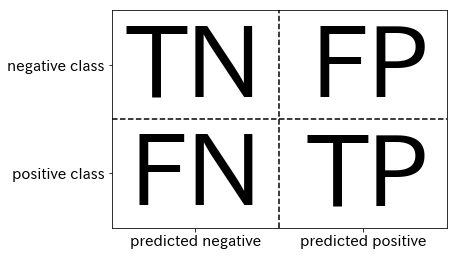

In [40]:
# 普通は陰性 : 0, 陽性: 1と判定する。
import mglearn
mglearn.plots.plot_binary_confusion_matrix()

10 class problem

In [41]:
from sklearn.datasets import load_digits
data = load_digits()

X = data.data
y = data.target

In [42]:
img = data.images

In [43]:
X[0].shape, img[0].shape # img は8 * 8画素のもので、Xはそれを横に並べたものを積んだデータ行列

((64,), (8, 8))

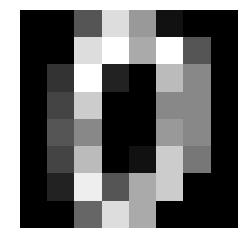

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.gray()
plt.imshow(img[0], interpolation='none')
plt.axis('off');

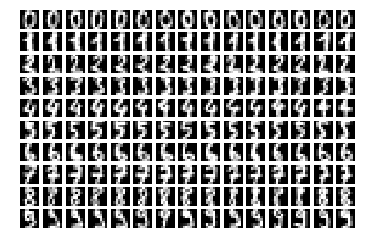

In [51]:
for i in range(10):
    i_th_digit = data.images[data.target == i]
    for j in range(0,15):
        plt.subplot(10, 15, i * 15 + j +1)
        plt.axis('off')
        plt.imshow(i_th_digit[j], interpolation='none')

In [52]:
from sklearn.model_selection import ShuffleSplit
ss = ShuffleSplit(n_splits=1,
                  train_size=0.8,
                  test_size=0.2, 
                  random_state=0)

train_index, test_index = next(ss.split(X, y))

X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]

In [53]:
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [54]:
clf.score(X_test, y_test)

0.94999999999999996

In [56]:
y_pred = clf.predict(X_test)
y_pred

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5, 2, 8, 6, 6, 6, 6, 1, 0, 5, 8, 8, 7, 8,
       4, 7, 5, 4, 9, 2, 9, 4, 7, 6, 8, 9, 4, 3, 8, 0, 1, 8, 6, 7, 7, 1, 0,
       7, 6, 2, 1, 9, 6, 7, 9, 0, 0, 5, 1, 6, 3, 0, 2, 3, 4, 1, 9, 2, 6, 9,
       1, 8, 3, 5, 1, 2, 8, 2, 2, 9, 7, 2, 3, 6, 0, 5, 3, 7, 5, 1, 2, 9, 9,
       3, 1, 4, 7, 4, 8, 5, 8, 5, 5, 2, 5, 9, 0, 7, 1, 4, 1, 3, 4, 8, 9, 7,
       9, 8, 2, 1, 5, 2, 5, 8, 4, 1, 7, 0, 6, 1, 5, 5, 9, 9, 5, 9, 9, 5, 7,
       5, 6, 2, 8, 6, 9, 6, 1, 5, 1, 5, 9, 8, 1, 5, 3, 6, 1, 8, 9, 8, 7, 6,
       7, 6, 5, 6, 0, 8, 8, 9, 8, 6, 1, 0, 4, 1, 6, 3, 8, 6, 7, 4, 9, 6, 3,
       0, 3, 3, 3, 0, 7, 7, 5, 7, 8, 0, 7, 1, 9, 6, 4, 5, 0, 1, 4, 6, 4, 3,
       3, 0, 9, 5, 3, 2, 8, 4, 2, 1, 6, 9, 9, 2, 4, 9, 3, 7, 6, 2, 3, 3, 1,
       6, 9, 3, 6, 3, 3, 2, 0, 7, 6, 1, 1, 9, 7, 2, 7, 8, 5, 5, 7, 5, 3, 3,
       7, 2, 7, 5, 5, 7, 0, 9, 1, 6, 5, 9, 7, 4, 3, 8, 0, 3, 6, 4, 6, 3, 2,
       6, 8, 8, 8, 4, 6, 7, 5, 2, 4, 5, 3, 2, 4, 6, 9, 4, 5, 4, 3, 4, 6, 2,
       9, 0,

In [57]:
accuracy_score(y_test, y_pred)

0.94999999999999996

In [64]:
conf_mat = confusion_matrix(y_test, y_pred)

df = pd.DataFrame(conf_mat, 
                  columns=range(0,10), 
                  index=range(0,10))
df

,0,1,2,3,4,5,6,7,8,9
0,27,0,0,0,0,0,0,0,0,0
1,0,31,0,0,0,0,1,0,3,0
2,0,0,34,2,0,0,0,0,0,0
3,0,0,0,29,0,0,0,0,0,0
4,0,0,0,0,30,0,0,0,0,0
5,0,0,0,0,0,39,0,0,0,1
6,0,1,0,0,0,0,43,0,0,0
7,0,1,0,0,1,0,0,37,0,0
8,0,2,1,0,0,0,0,0,35,1
9,0,0,0,1,0,1,0,0,2,37


In [65]:
from sklearn.decomposition import PCA
pca = PCA(whiten=True)
pca.fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca  = pca.transform(X_test)

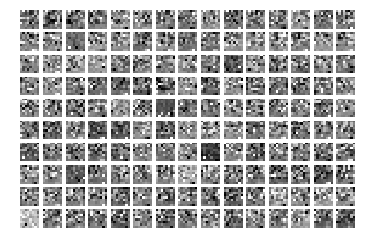

In [66]:
# PCA whitening したデータをみてみる。
for i in range(10):
    i_th_digit = X_train_pca[y_train == i]
    for j in range(0,15):
        plt.subplot(10, 15, i * 15 + j +1)
        plt.axis('off')
        plt.imshow(i_th_digit[j].reshape(8,8), interpolation='none')

In [67]:
clf.fit(X_train_pca, y_train)
clf.score(X_test_pca, y_test) # 識別性能は上がっている。

0.9555555555555556

In [70]:
y_pred_pca = clf.predict(X_test_pca)
conf_mat = confusion_matrix(y_test, y_pred_pca)

df = pd.DataFrame(conf_mat, 
                  columns=range(0,10), 
                  index=range(0,10))
df # 行方向に真のもの、列方向に予測ラベルがくる

,0,1,2,3,4,5,6,7,8,9
0,27,0,0,0,0,0,0,0,0,0
1,0,32,0,0,0,0,1,0,2,0
2,0,0,35,1,0,0,0,0,0,0
3,0,0,0,29,0,0,0,0,0,0
4,0,0,0,0,29,0,0,1,0,0
5,0,1,0,0,0,38,0,0,0,1
6,0,1,0,0,0,0,43,0,0,0
7,0,0,0,0,0,0,0,39,0,0
8,0,3,1,0,0,0,0,0,35,0
9,0,0,0,0,0,1,0,2,1,37


In [74]:
# PCA whitening したものに主成分方向のベクトルを積んだものをかける
# つまり ZCA whitening を行う。
X_train_zca = X_train_pca.dot(pca.components_)
X_test_zca  = X_test_pca.dot(pca.components_)

(64, 64)

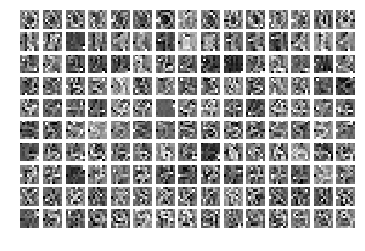

In [72]:
for i in range(10):
    i_th_digit = X_train_zca[y_train == i]
    for j in range(0,15):
        plt.subplot(10, 15, i * 15 + j +1)
        plt.axis('off')
        plt.imshow(i_th_digit[j].reshape(8,8), interpolation='none')

In [75]:
clf.fit(X_train_zca, y_train)
clf.score(X_test_zca, y_test)

0.9555555555555556

In [76]:
y_pred_zca = clf.predict(X_test_zca)
conf_mat = confusion_matrix(y_test, y_pred_zca)

df = pd.DataFrame(conf_mat, 
                  columns=range(0,10), 
                  index=range(0,10))
print(df)

    0   1   2   3   4   5   6   7   8   9
0  27   0   0   0   0   0   0   0   0   0
1   0  32   0   0   0   0   1   0   2   0
2   0   0  35   1   0   0   0   0   0   0
3   0   0   0  29   0   0   0   0   0   0
4   0   0   0   0  29   0   0   1   0   0
5   0   1   0   0   0  38   0   0   0   1
6   0   1   0   0   0   0  43   0   0   0
7   0   0   0   0   0   0   0  39   0   0
8   0   3   1   0   0   0   0   0  35   0
9   0   0   0   0   0   1   0   2   1  37


In [84]:
# PCA whitening で次元削減をして識別率の変化をみてみる。
scores = []
for i in range(1,65):
    clf.fit(X_train_pca[:, 0:i], y_train)
    score = clf.score(X_test_pca[:, 0:i], y_test)
    print(i, score)
    scores.append(score)
scores = np.array(scores)

1 0.327777777778
2 0.536111111111
3 0.633333333333
4 0.761111111111
5 0.8
6 0.811111111111
7 0.866666666667
8 0.875
9 0.902777777778
10 0.911111111111
11 0.936111111111
12 0.938888888889
13 0.933333333333
14 0.936111111111
15 0.936111111111
16 0.941666666667
17 0.95
18 0.947222222222
19 0.95
20 0.95
21 0.95
22 0.952777777778
23 0.952777777778
24 0.95
25 0.944444444444
26 0.947222222222
27 0.947222222222
28 0.952777777778
29 0.955555555556
30 0.947222222222
31 0.95
32 0.95
33 0.952777777778
34 0.952777777778
35 0.95
36 0.95
37 0.952777777778
38 0.947222222222
39 0.955555555556
40 0.952777777778
41 0.958333333333
42 0.955555555556
43 0.958333333333
44 0.961111111111
45 0.958333333333
46 0.961111111111
47 0.958333333333
48 0.958333333333
49 0.955555555556
50 0.955555555556
51 0.961111111111
52 0.961111111111
53 0.961111111111
54 0.958333333333
55 0.958333333333
56 0.961111111111
57 0.958333333333
58 0.958333333333
59 0.961111111111
60 0.955555555556
61 0.955555555556
62 0.955555555556
63 

(0.9, 1)

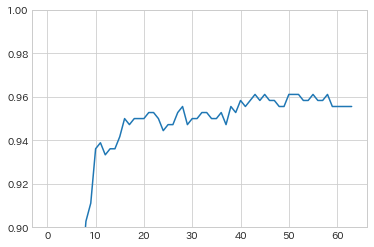

In [87]:
import seaborn as sns
sns.set_style('whitegrid')
plt.plot(scores)
plt.ylim(0.9, 1)

In [78]:
X_train_pca.mean(axis=0), X_train_pca.std(axis=0)

(array([  4.59695685e-18,  -6.86066838e-17,  -7.64099215e-17,
         -9.92788161e-17,  -3.74709928e-17,   3.62348364e-17,
         -7.46329465e-17,   2.70409227e-17,   1.25160842e-17,
         -1.15348850e-16,  -2.08446884e-16,  -3.43033419e-17,
         -3.06566803e-16,  -1.05208504e-16,  -3.73551032e-17,
         -8.71490307e-17,  -1.15889669e-16,  -7.09244771e-17,
          2.80607517e-16,   9.92015563e-17,  -1.39994720e-16,
          2.49838810e-16,   1.21066074e-16,  -2.46381435e-16,
         -1.04416591e-16,  -7.44784270e-17,   2.49877440e-16,
         -3.67138470e-16,  -8.76125894e-17,  -2.79139582e-16,
         -6.27349406e-17,   3.38011533e-17,  -9.11085944e-17,
         -2.55884388e-16,  -1.81560481e-16,   2.61910651e-16,
         -8.92350448e-17,  -1.84148683e-16,  -3.19391926e-16,
         -4.15783158e-16,   1.81589453e-16,  -2.66835962e-16,
         -6.14987841e-17,  -4.69739456e-17,  -2.69095810e-16,
          4.83646217e-17,   1.77110800e-16,  -5.47892552e-17,
        

In [80]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scale = scaler.transform(X_train)

In [82]:
X_train_scale.mean(axis=0) # 画像の画素値を特徴としているので、常に同じ画素値があり、平均０、分散１がある

array([  0.00000000e+00,   9.51840478e-17,  -1.38990342e-16,
        -1.37908706e-16,  -4.21838393e-17,  -2.02652400e-16,
        -8.17022163e-17,   1.13011742e-16,   3.32535746e-16,
        -1.43703189e-16,  -3.61575766e-17,   3.03746821e-16,
         1.54220176e-16,  -9.71928020e-17,   6.05716668e-17,
         1.67846870e-16,   1.30501424e-16,  -1.28251233e-16,
        -2.16404641e-16,   1.09090808e-16,   1.27478635e-17,
         5.10687139e-17,   1.90522615e-16,  -3.73454457e-16,
        -7.40187313e-16,  -6.02626276e-17,  -8.60287639e-17,
         2.90496769e-17,   3.55394984e-18,   1.35204613e-17,
        -4.22070173e-16,   1.48840964e-16,   0.00000000e+00,
        -3.11974988e-16,   1.03528104e-17,   2.08601403e-16,
        -1.36286250e-16,  -5.85629125e-17,  -1.17512124e-16,
         0.00000000e+00,  -1.40429306e-16,  -1.66031265e-16,
         1.95467241e-17,   2.81457375e-16,   4.20293198e-17,
         1.24175780e-16,   4.81946502e-16,  -3.82358646e-16,
         1.99137080e-16,

In [83]:
X_train_scale.std(axis=0)

array([ 0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,
        0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])